# DimmerAttenuation

Test the library and show simple example on how to use it!

email: antineutrinomuon@gmail.com

© Copyright ®

J.G. - Jean Gomes

last version tested: 0.0.1

In [1]:
# Import necessary routines
from dimmerattenuation import flib as attenuation
from dimmerattenuation import Reddening as reddening

In [3]:
# Or we can invoke each of the laws separately, like:
from dimmerattenuation.flib import caf__lawopt as caf

In [8]:
import dimmerattenuation.flib as flib

# Get all attributes (subroutines, classes, functions, etc.) of the module
all_attributes = dir(flib)

# Filter out only the subroutines (functions) and scripts (modules)
subroutines_and_scripts = [attr for attr in all_attributes if callable(getattr(flib, attr)) or isinstance(getattr(flib, attr), type(flib))]

# Print the filtered list
# Print the filtered list as rows
print("List of scripts inside the fortran library (flib)")
for item in subroutines_and_scripts:
    print(item)

List of scripts inside the fortran library (flib)
_flib_error
author
author_spline1darr
caf__lawopt
calr_lawopt
calr_lawopt_author
calr_lawopt_info
ccmr_lawopt
ccmr_lawopt_author
ccmr_lawopt_info
cl_r_lawopt
cl_r_lawopt_author
cl_r_lawopt_info
h83galawopt
h83galawopt_author
h83galawopt_info
info
j13__lawopt
j13__lawopt_author
j13__lawopt_info
leitherer02
leitherer02_author
leitherer02_info
moddatatype
o_donnell94
o_donnell94_author
o_donnell94_info
s79__lawopt
s79__lawopt_author
s79__lawopt_info
spline1darr


In [11]:
# Import astropy libraries
from astropy.io import fits
from astropy import units as u
from astropy.visualization import quantity_support

# Example of a slice of a SDSS spectrum with emission-lines
f = fits.open(
    'https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/1323/spec-1323-52797-0012.fits'
)

# The spectrum is in the second HDU of this file.
specdata = f[1].data[1020:1250]
f.close()

In [13]:
# Import specutils to convert format
from specutils import Spectrum1D

lamb = 10**specdata['loglam'] * u.AA
flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1')
input_spec = Spectrum1D(spectral_axis=lamb, flux=flux)

Text(0, 0.5, 'Fluxes')

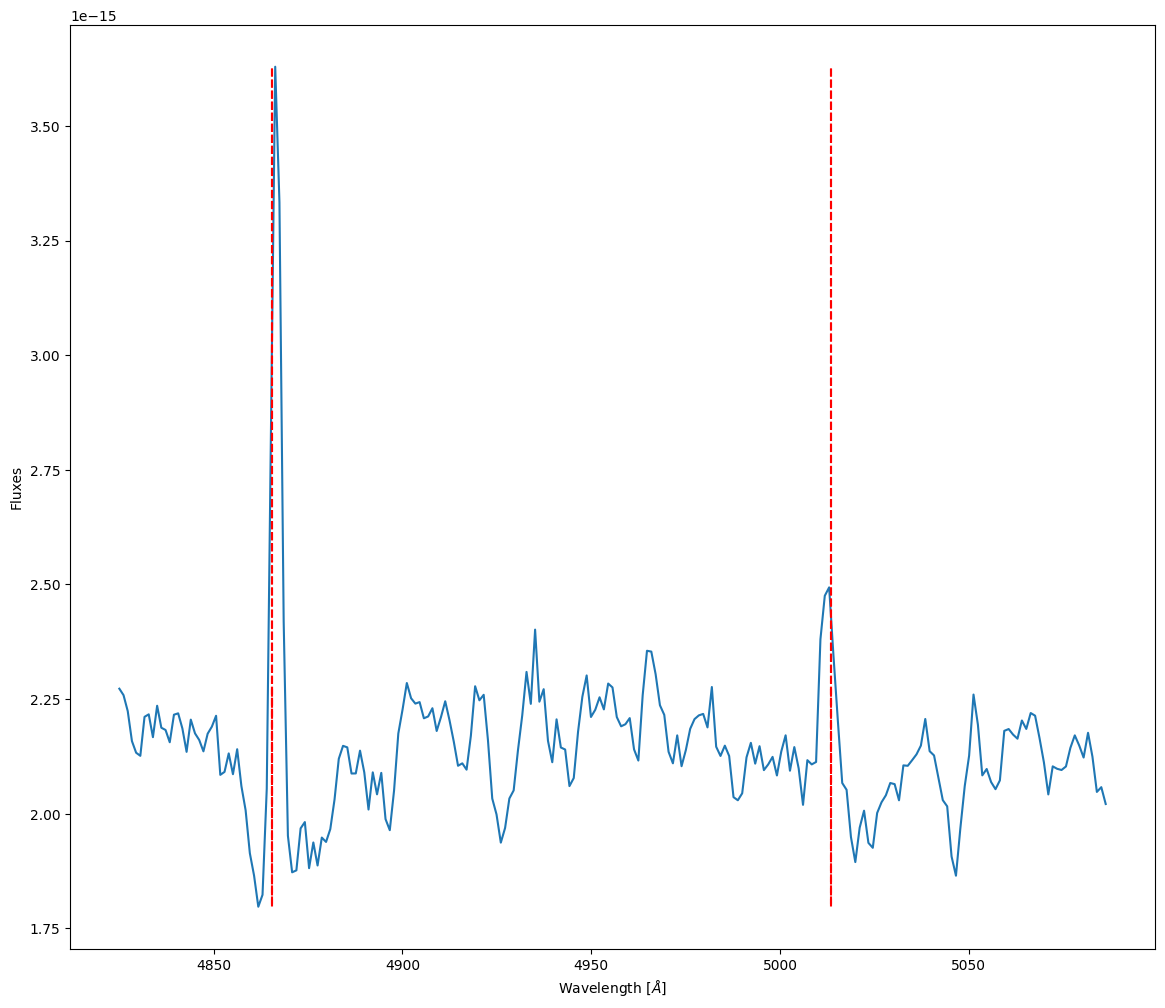

In [16]:
import matplotlib.pyplot as plt

# Set default figure size for the entire notebook
width=14
heigh=12

# Plot spectrum
delta_l = 4.5

plt.figure(figsize=(width,heigh))

plt.plot(lamb,flux)
plt.plot(lamb.value*0+4861+delta_l,flux,linestyle='--',color='red')
plt.plot(lamb.value*0+5009+delta_l,flux,linestyle='--',color='red')

plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel('Fluxes')

... Reddening Initiated


Text(0, 0.5, 'Fluxes')

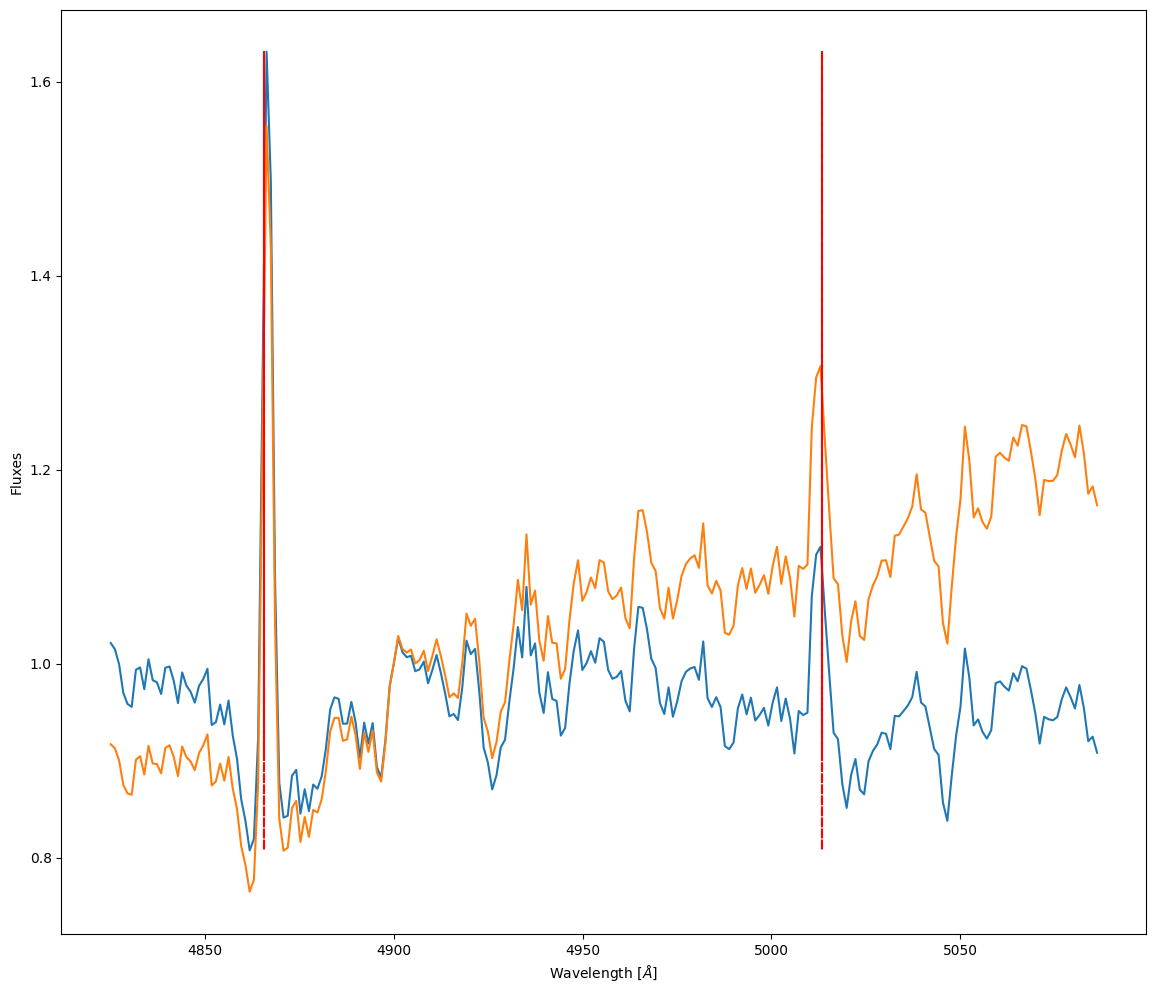

In [36]:
import numpy as np

# Now let us apply an attenuation of 4.96 mag in the visual band this spectrum
r = reddening.attenuation()
A_V = 4.96 * u.mag
R_V = 3.1
flux_A_V = o.extinct(lamb, flux, A_V=A_V.value, R_V=R_V, law='ccm') * flux.unit

l_norm = 4900.0
flux_norm = np.interp(l_norm,lamb.value,flux.value)
flux_A_V_norm = np.interp(l_norm,lamb.value,flux_A_V)

# Set default figure size for the entire notebook
width=14
heigh=12

# Plot spectrum
delta_l = 4.5

plt.figure(figsize=(width,heigh))

plt.plot(lamb,flux/flux_norm)
plt.plot(lamb,flux_A_V/flux_A_V_norm)
plt.plot(lamb.value*0+4861+delta_l,flux/flux_norm,linestyle='--',color='red')
plt.plot(lamb.value*0+5009+delta_l,flux/flux_norm,linestyle='--',color='red')

plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel('Fluxes')